In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk
from pathlib import Path
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from dotenv import find_dotenv, load_dotenv
load_dotenv(find_dotenv())
import numpy as np

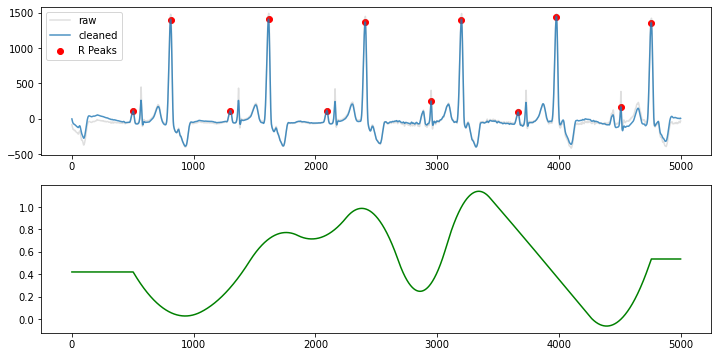

In [ ]:
def clean_filter_ecg_signal(raw_signal, min_quality=0.25, quality_method='averageQRS', sampling_rate=500):

    # clean the signal
    ecg_cleaned = nk.ecg_clean(raw_signal, sampling_rate=sampling_rate)

    # find peaks
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=sampling_rate)

    # find heart rate
    # heartrate = nk.ecg_rate(rpeaks, sampling_rate=sampling_rate, desired_length=len(ecg_cleaned))  # TODO was macht desired_length?

    # determine signal quality
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=sampling_rate, method=quality_method)

    return ecg_cleaned, rpeaks['ECG_R_Peaks'], quality


# load signal for ECG run
input_file = Path('../data/interim/ecg_runs_covid/COVID3250_RUN20180426114019.358.txt')
raw_signal = np.loadtxt(input_file, skiprows=12)[1, :]  # for now we only use Lead II as it gives the best picture by itself

cleaned_signal, rpeaks, quality = clean_filter_ecg_signal(raw_signal)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(raw_signal, alpha=0.25, c='gray', label='raw')
plt.plot(cleaned_signal, alpha=0.8, label='cleaned')
plt.scatter(x=rpeaks, y=cleaned_signal[rpeaks], c='red', label="R Peaks")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(quality, c='green')
plt.show()